In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [116]:
file_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Code/0101.고등교육학교개황(09-22)(100%).csv'
data_school = pd.read_csv(file_path, encoding='cp949')
data_school = data_school[data_school["학교구분명"] == "대학"]
keep_values = ['대학', '산업대학', '교육대학', '기술대학(대학과정)', '기술대학(전문대학과정)']
data_school = data_school[data_school["학제유형명"].isin(keep_values)]

In [117]:
file_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Code/0102.대학교개황(09-22)(100%).csv'
data_college = pd.read_csv(file_path, encoding='euc-kr') 
data_college = data_college[data_college["학교구분명"] == "대학"]
keep_values = ['대학', '산업대학', '교육대학', '기술대학(대학과정)', '기술대학(전문대학과정)']
data_college = data_college[data_college["학제유형명"].isin(keep_values)]
data_college = data_college[['조사년도', '학교명', '시도명', '학제유형명', '대학교개황_입학생수', '대학교개황_재학생수', '대학교개황_재적학생수']]
print(data_college.head())


   조사년도      학교명 시도명 학제유형명  대학교개황_입학생수  대학교개황_재학생수  대학교개황_재적학생수
0  2009  광주여자대학교  광주    대학        1121        3702         3988
1  2009    호원대학교  전북  산업대학        1509        5615         8963
2  2009    우송대학교  대전  산업대학           0        4911         8904
3  2009    삼육대학교  서울    대학        1398        4870         6667
5  2009   선교청대학교  충남    대학          64         167          213


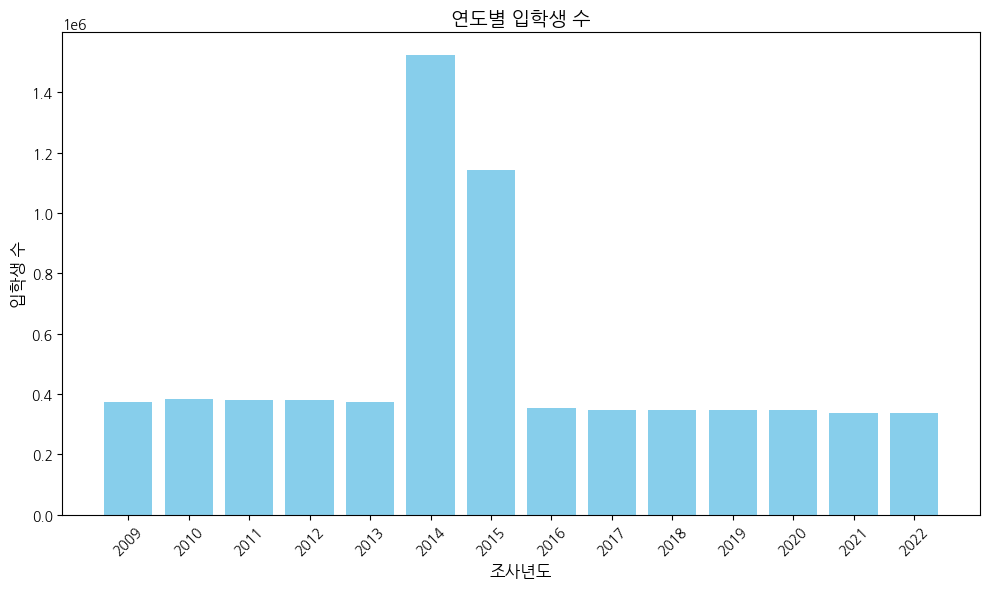

In [124]:
yearly_data = data_college.groupby('조사년도')['대학교개황_입학생수'].sum()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data.values, color='skyblue')
plt.xlabel('조사년도', fontsize=12)
plt.ylabel('입학생 수', fontsize=12)
plt.title('연도별 입학생 수', fontsize=14)
plt.xticks(yearly_data.index, rotation=45)
plt.tight_layout()
plt.show()

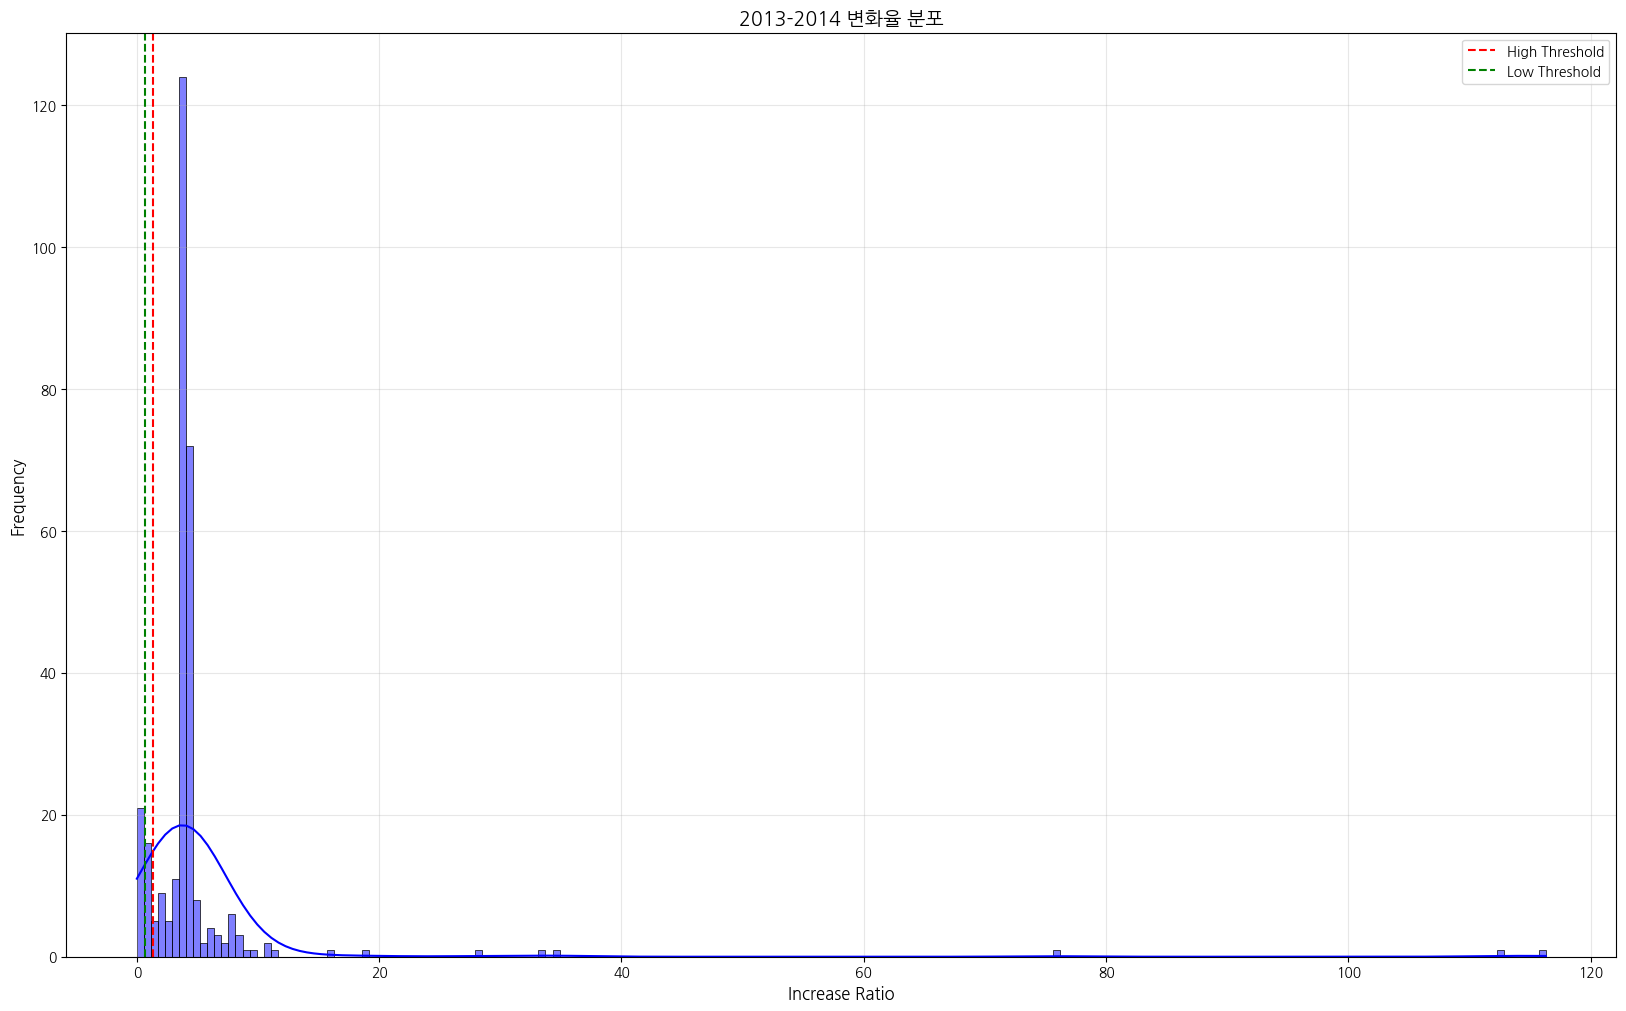


정상적인 증가율을 보인 학교들:
           학교명  increase_ratio
12       전남대학교        1.013810
17       경운대학교        1.112857
43       을지대학교        0.720410
93       경동대학교        1.015889
98       경동대학교        0.874317
100      경동대학교        0.944773
108     성공회대학교        1.012389
113    예원예술대학교        1.193103
119      초당대학교        0.953933
128  서울과학기술대학교        0.916318
155     성균관대학교        1.024867
173      경기대학교        0.842872
258      한동대학교        0.984615
278     남서울대학교        1.064528
323      한밭대학교        0.962621


In [127]:
data_2013 = data_school[data_school["조사년도"] == 2013]
data_2014 = data_school[data_school["조사년도"] == 2014]

merged_data = pd.merge(data_2013, data_2014, on="학교명", suffixes=("_2013", "_2014"))

merged_data["increase_ratio"] = (
    merged_data["고등교육학교_입학생수_2014"] / merged_data["고등교육학교_입학생수_2013"]
)
high_threshold = 1.3
low_threshold = 0.7

plt.figure(figsize=(20, 12))
sns.histplot(merged_data["increase_ratio"], bins=200, kde=True, color='blue')
plt.axvline(high_threshold, color='red', linestyle='--', label='High Threshold')
plt.axvline(low_threshold, color='green', linestyle='--', label='Low Threshold')
plt.title("2013-2014 변화율 분포", fontsize=14)
plt.xlabel("Increase Ratio", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

normal_schools = merged_data[merged_data["increase_ratio"] < high_threshold]
normal_schools = normal_schools[normal_schools["increase_ratio"] > low_threshold]
print("\n정상적인 증가율을 보인 학교들:")
print(normal_schools[["학교명", "increase_ratio"]])

In [121]:
normal_school_names = normal_schools["학교명"].tolist()
print(normal_school_names)

['전남대학교', '경운대학교', '을지대학교', '안양대학교', '정석대학', '경동대학교', '경동대학교', '경동대학교', '경동대학교', '경동대학교', '경동대학교', '고려대학교', '성공회대학교', '예원예술대학교', '초당대학교', '서울과학기술대학교', '강릉원주대학교', '성균관대학교', '경기대학교', '인천가톨릭대학교', '한동대학교', '남서울대학교', '한밭대학교']


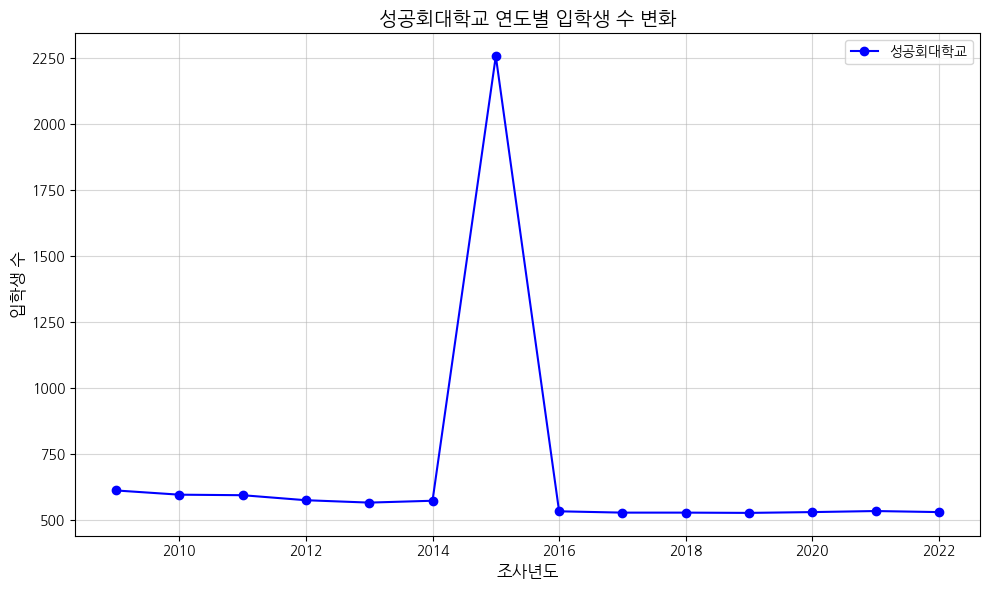

In [122]:
import matplotlib.pyplot as plt

target_university = "성공회대학교"

university_data = data_college[data_college["학교명"] == target_university]

plt.figure(figsize=(10, 6))
plt.plot(
    university_data["조사년도"],
    university_data["대학교개황_입학생수"],
    marker="o",
    linestyle="-",
    color="blue",
    label=target_university,
)

plt.title(f"{target_university} 연도별 입학생 수 변화", fontsize=14)
plt.xlabel("조사년도", fontsize=12)
plt.ylabel("입학생 수", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()